In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
!ls drive/MyDrive/CS541/data

FashionDataset.csv  samples.csv  wikipedia-list-of-colors.txt


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import regex as re
from itertools import combinations

import warnings
warnings.filterwarnings("ignore")

# 1) Preprocessing

## 1.1) Load Dataset

In [ ]:
df = pd.read_csv("drive/MyDrive/CS541/data/FashionDataset.csv")

df = df[df.columns[1:]]
df = df.rename(columns={"Deatils": "Details"})
pd.options.display.max_colwidth = 100

In [ ]:
df

,BrandName,Details,Sizes,MRP,SellPrice,Discount,Category
0,life,solid cotton blend collar neck womens a-line dress - indigo,"Size:Large,Medium,Small,X-Large,X-Small",Rs\n1699,849,50% off,Westernwear-Women
1,only,polyester peter pan collar womens blouson dress - yellow,"Size:34,36,38,40",Rs\n3499,2449,30% off,Westernwear-Women
2,fratini,solid polyester blend wide neck womens regular top - off white,"Size:Large,X-Large,XX-Large",Rs\n1199,599,50% off,Westernwear-Women
3,zink london,stripes polyester sweetheart neck womens dress - black,"Size:Large,Medium,Small,X-Large",Rs\n2299,1379,40% off,Westernwear-Women
4,life,regular fit regular length denim womens jeans - stone,"Size:26,28,30,32,34,36",Rs\n1699,849,50% off,Westernwear-Women
...,...,...,...,...,...,...,...
30753,swarovski,crystal stylish womens rodhium earrings,Nan,Nan,8950,Nan,Jewellery-Women
30754,Nan,Nan,Nan,Nan,Nan,Nan,Jewellery-Women
30755,jewelz,ethnic gold plated jhumki earrings,Nan,Rs\n1839,643,65% off,Jewellery-Women
30756,estelle,womens gold plated double line fancy white and gold pearl necklace,Nan,Nan,2799,Nan,Jewellery-Women


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30758 entries, 0 to 30757
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   BrandName  30758 non-null  object
 1   Details    30758 non-null  object
 2   Sizes      30758 non-null  object
 3   MRP        30758 non-null  object
 4   SellPrice  30758 non-null  object
 5   Discount   30758 non-null  object
 6   Category   30758 non-null  object
dtypes: object(7)
memory usage: 1.6+ MB


## 1.2) Find and Update Nulls

In [ ]:
#"Nan" string is used instead of null-value so replace to find true nulls

df = df.replace("Nan", np.NaN)

df

,BrandName,Details,Sizes,MRP,SellPrice,Discount,Category
0,life,solid cotton blend collar neck womens a-line dress - indigo,"Size:Large,Medium,Small,X-Large,X-Small",Rs\n1699,849,50% off,Westernwear-Women
1,only,polyester peter pan collar womens blouson dress - yellow,"Size:34,36,38,40",Rs\n3499,2449,30% off,Westernwear-Women
2,fratini,solid polyester blend wide neck womens regular top - off white,"Size:Large,X-Large,XX-Large",Rs\n1199,599,50% off,Westernwear-Women
3,zink london,stripes polyester sweetheart neck womens dress - black,"Size:Large,Medium,Small,X-Large",Rs\n2299,1379,40% off,Westernwear-Women
4,life,regular fit regular length denim womens jeans - stone,"Size:26,28,30,32,34,36",Rs\n1699,849,50% off,Westernwear-Women
...,...,...,...,...,...,...,...
30753,swarovski,crystal stylish womens rodhium earrings,NaN,NaN,8950,NaN,Jewellery-Women
30754,NaN,NaN,NaN,NaN,NaN,NaN,Jewellery-Women
30755,jewelz,ethnic gold plated jhumki earrings,NaN,Rs\n1839,643,65% off,Jewellery-Women
30756,estelle,womens gold plated double line fancy white and gold pearl necklace,NaN,NaN,2799,NaN,Jewellery-Women


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30758 entries, 0 to 30757
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   BrandName  29575 non-null  object
 1   Details    29575 non-null  object
 2   Sizes      23257 non-null  object
 3   MRP        22550 non-null  object
 4   SellPrice  29575 non-null  object
 5   Discount   22550 non-null  object
 6   Category   30758 non-null  object
dtypes: object(7)
memory usage: 1.6+ MB


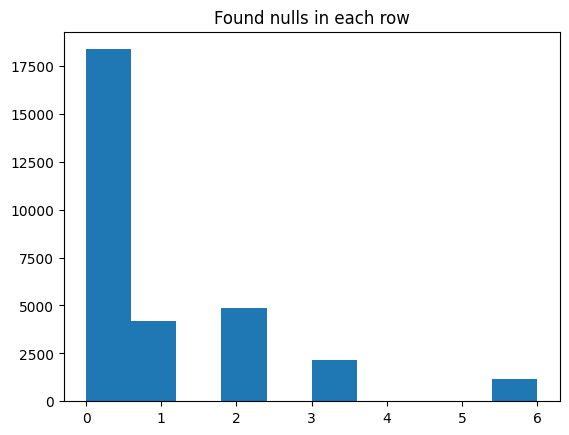

In [ ]:
plt.hist(df.isnull().sum(axis=1))
plt.title("Found nulls in each row")
plt.show()

In [ ]:
df = df[df.isnull().sum(axis=1) != 6]

In [ ]:
#Sizes, MRP and Discount still contain nulls
#MRP and Discount have same non-null count
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29575 entries, 0 to 30757
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   BrandName  29575 non-null  object
 1   Details    29575 non-null  object
 2   Sizes      23257 non-null  object
 3   MRP        22550 non-null  object
 4   SellPrice  29575 non-null  object
 5   Discount   22550 non-null  object
 6   Category   29575 non-null  object
dtypes: object(7)
memory usage: 1.8+ MB


In [ ]:
#Check if MRP and Discount are actually both non nulls in respective rows
np.all(df["MRP"].isnull() == df["Discount"].isnull())

True

In [ ]:
#Examples: MRP is maximum retail, thus it is equal to sellprice (cost with discount) since there is no discount.
df[df["MRP"].isnull()].head()

,BrandName,Details,Sizes,MRP,SellPrice,Discount,Category
28,zink z,solid cotton blend v neck womens top - maroon,"Size:Large,Medium,Small,X-Large,X-Small",NaN,1299,NaN,Westernwear-Women
36,fratini,printed polyester blend round neck womens a-line dress - white,"Size:Large,Medium,Small,X-Large,XX-Large",NaN,1799,NaN,Westernwear-Women
61,levis,graphic cotton round neck womens t-shirt - brown,"Size:Large,Medium,Small,X-Small",NaN,1199,NaN,Westernwear-Women
69,levis,tapered fit regular length cotton womens jeans - dk indigo,"Size:26,28,30,32,34",NaN,3799,NaN,Westernwear-Women
92,fratini,sanya malhotra regular fit regular length cotton linen womens culottes - olive,"Size:26,28,30,32,34,36",NaN,1299,NaN,Westernwear-Women


In [ ]:
#Drop MRP and use sell price for cost, replace nulls in Discount with "No" discount
df = df.drop(["MRP"], axis=1)

In [ ]:
df["Discount"][df["Discount"].isnull()] = "No"

In [ ]:
df

,BrandName,Details,Sizes,SellPrice,Discount,Category
0,life,solid cotton blend collar neck womens a-line dress - indigo,"Size:Large,Medium,Small,X-Large,X-Small",849,50% off,Westernwear-Women
1,only,polyester peter pan collar womens blouson dress - yellow,"Size:34,36,38,40",2449,30% off,Westernwear-Women
2,fratini,solid polyester blend wide neck womens regular top - off white,"Size:Large,X-Large,XX-Large",599,50% off,Westernwear-Women
3,zink london,stripes polyester sweetheart neck womens dress - black,"Size:Large,Medium,Small,X-Large",1379,40% off,Westernwear-Women
4,life,regular fit regular length denim womens jeans - stone,"Size:26,28,30,32,34,36",849,50% off,Westernwear-Women
...,...,...,...,...,...,...
30752,shaya by caratlane,the wing woman clover charm necklace,NaN,1250,No,Jewellery-Women
30753,swarovski,crystal stylish womens rodhium earrings,NaN,8950,No,Jewellery-Women
30755,jewelz,ethnic gold plated jhumki earrings,NaN,643,65% off,Jewellery-Women
30756,estelle,womens gold plated double line fancy white and gold pearl necklace,NaN,2799,No,Jewellery-Women


In [ ]:
#only nulls in sizes now
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29575 entries, 0 to 30757
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   BrandName  29575 non-null  object
 1   Details    29575 non-null  object
 2   Sizes      23257 non-null  object
 3   SellPrice  29575 non-null  object
 4   Discount   29575 non-null  object
 5   Category   29575 non-null  object
dtypes: object(6)
memory usage: 1.6+ MB


## 1.3) Preprocessing

## 1.3.1) Prices

In [ ]:
#Convert sell price to numeric

df["SellPrice"] = df["SellPrice"].astype(float)

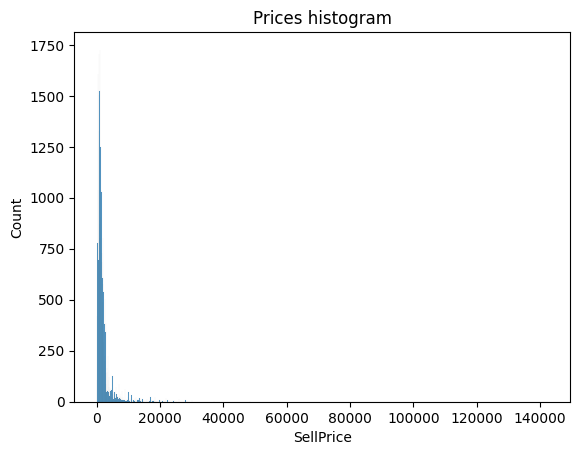

In [ ]:
#possibly bad data check for outliers
sns.histplot(df["SellPrice"])
plt.title("Prices histogram")
plt.show()

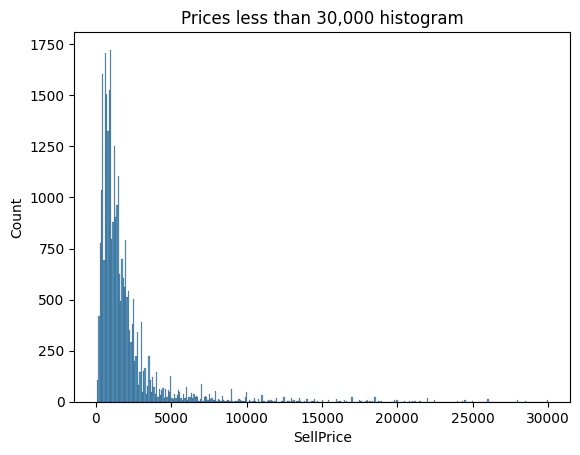

In [ ]:
#prices under 30K
sns.histplot(df["SellPrice"][df["SellPrice"] < 30000])
plt.title("Prices less than 30,000 histogram")
plt.show()

In [ ]:
print("Lowest Cost Products: ")
df.sort_values(by=["SellPrice"]).head(10)

Lowest Cost Products: 


,BrandName,Details,Sizes,SellPrice,Discount,Category
2155,life,womens 2 ply protective face mask - pack of 5 - multi,NaN,74.0,50% off,Westernwear-Women
29174,ayesha,womens gold plated earrings - multi,NaN,89.0,70% off,Jewellery-Women
29366,ayesha,womens silver plated earrings - multi,NaN,89.0,70% off,Jewellery-Women
29154,ayesha,womens multi earrings,NaN,89.0,70% off,Jewellery-Women
29263,ayesha,womens gold plated earrings - multi,NaN,89.0,70% off,Jewellery-Women
29041,ayesha,womens gold plated earrings - multi,NaN,89.0,70% off,Jewellery-Women
29503,ayesha,womens geometric metallic studs set of 6 pairs - multi,NaN,89.0,70% off,Jewellery-Women
30127,ayesha,womens silver plated earrings - multi,NaN,89.0,70% off,Jewellery-Women
29652,ayesha,womens hearts and flowers metallic studs set of 6 pairs - multi,NaN,89.0,70% off,Jewellery-Women
29276,ayesha,mens rugged brown leather adjustable multi-layer bracelet and necklace,NaN,89.0,70% off,Jewellery-Women


In [ ]:
print("Highest Cost Products: ")
df.sort_values(by=["SellPrice"]).tail(10)

Highest Cost Products: 


,BrandName,Details,Sizes,SellPrice,Discount,Category
27297,versace,womens blue dial pop chic lady 36mm stainless steel analogue watch - vevd00319,NaN,44000.0,No,Watches-Women
27431,tissot,mens 39.3 mm le locle powermatic 80 blue dial stainless steel analogue watch - t0064071104300,NaN,48500.0,No,Watches-Women
27844,versace,womens white pop chic lady 36mm analogue watch - wvevd00519n,NaN,48500.0,No,Watches-Women
27437,versace,womens 36 mm blue dial bracelet analogue watch - vek400821,NaN,55700.0,No,Watches-Women
28168,versace,womens v- motif gold-tone yellow gold ion plated analogue watch,NaN,91100.0,No,Watches-Women
27704,versace,womens 35 mm v-motif white-silver dial stainless steel analog watch - vere02420,NaN,91900.0,No,Watches-Women
27927,versace,womens 36 mm versace essential black dial stainless steel analogue watch - vek400621,NaN,99100.0,No,Watches-Women
28322,versace,unisex 43 mm pink dial bracelet analogue watch - vez300621,NaN,108000.0,No,Watches-Women
27551,versace,womens 34 mm meander white dial steel ion plating 5n analogue watch - velw00620,NaN,137900.0,No,Watches-Women
27539,versace,womens 36 mm greca icon silver white guilloch dial stainless steel analog watch - vez600621,NaN,142500.0,No,Watches-Women


Based on the highest/lowest items, it is likely these are the correct values, since products like face masks, and cheap earrings cost less (\$1), while name brands i.e versace costs 50,000-100,000Rs (\$1000) range.

## 1.3.2) Sizes

In [ ]:
#check error size, possibly not only for watches/perfumes
df[df["Sizes"].isnull() != True]

,BrandName,Details,Sizes,SellPrice,Discount,Category
0,life,solid cotton blend collar neck womens a-line dress - indigo,"Size:Large,Medium,Small,X-Large,X-Small",849.0,50% off,Westernwear-Women
1,only,polyester peter pan collar womens blouson dress - yellow,"Size:34,36,38,40",2449.0,30% off,Westernwear-Women
2,fratini,solid polyester blend wide neck womens regular top - off white,"Size:Large,X-Large,XX-Large",599.0,50% off,Westernwear-Women
3,zink london,stripes polyester sweetheart neck womens dress - black,"Size:Large,Medium,Small,X-Large",1379.0,40% off,Westernwear-Women
4,life,regular fit regular length denim womens jeans - stone,"Size:26,28,30,32,34,36",849.0,50% off,Westernwear-Women
...,...,...,...,...,...,...
26885,swiss eagle,womens analogue metallic watch,Size:Error Size,4197.0,70% off,Watches-Women
27290,lawman watches,womens rose gold dial stainless steel analogue watch - wi106d,Size:Error Size,4999.0,33% off,Watches-Women
28418,lawman watches,womens silver dial stainless steel analogue watch - lwwi105a,Size:Error Size,3999.0,33% off,Watches-Women
28664,miu miu,eau de parfum - 50 ml,Size:Error Size,6100.0,No,Fragrance-Women


In [ ]:
#these contain clothes as well so convert to null
df[df["Sizes"] == "Size:Error Size"].head(10)

,BrandName,Details,Sizes,SellPrice,Discount,Category
6807,jockey,women cotton v-neck t-shirt - black,Size:Error Size,399.0,No,Westernwear-Women
7784,jockey,cotton elastane womens t-shirt - blue melange,Size:Error Size,499.0,No,Westernwear-Women
7878,jockey,womens v neck t-shirt - wine,Size:Error Size,649.0,No,Westernwear-Women
8112,jockey,womens round neck slub t-shirt - red,Size:Error Size,439.0,No,Westernwear-Women
8509,jockey,tactel nylon womens activewear track pants - black,Size:Error Size,1799.0,No,Westernwear-Women
8744,jockey,womens v neck t-shirt - sea green,Size:Error Size,649.0,No,Westernwear-Women
8803,jockey,polyester spandex womens activewear track pants - weft_blue,Size:Error Size,1129.0,No,Westernwear-Women
9060,jockey,cotton elastane womens t-shirt - blue melange,Size:Error Size,549.0,No,Westernwear-Women
9105,jockey,womens round neck slub t-shirt - pink,Size:Error Size,439.0,No,Westernwear-Women
9349,jockey,womens v neck solid t-shirt - blue,Size:Error Size,399.0,No,Westernwear-Women


In [ ]:
df["Sizes"] = df["Sizes"].replace("Size:Error Size", np.NaN)

In [ ]:
#update indexes after dropping values
df = df.reset_index(drop=True)

In [ ]:
#get smallest and largest size in numeric US standard (0 XXS -> 26 4X)
def getSizes(size):

  #replace null with unweighted value
  if not isinstance(size, str):
    return ["None", "None"]


  size = size.replace("Size:", "")
  size = size.split(",")

  return [size[0], size[-1]]

#conversion from weight (inches) -> usa, via best fit line
# usa = 1.1144(inches) - 26.719

weight_to_usa = lambda x: round(1.1144*x - 26.719)

def convertSize(sizeval):

  #nulls
  if sizeval == "None":
    return -1

  #numeric
  if sizeval.isdigit():
    converted = weight_to_usa(int(sizeval))
    #if a conversion goes to negative it is likely already in usa standard
    if converted < 0:
      return int(sizeval)
    return converted

  #strings

  #count number of x's to handle x-large, x-small etc
  count_xs = sizeval.count("X")

  #small
  if "S" in sizeval:
    if count_xs >= 2:
      return 0
    elif count_xs == 1:
      return 1
    else:
      return 3

  #medium
  if "M" in sizeval:
    return 7

  #large
  if "L" in sizeval:
    if count_xs >= 2:
      return 15
    elif count_xs == 1:
      return 11
    else:
      return 9

  return -1

def convertSizeList(sizes):
  convert = getSizes(sizes)
  return sorted([convertSize(size) for size in convert])

In [ ]:
df[["MinSize", "MaxSize"]] = df["Sizes"].apply(convertSizeList).to_list()

In [ ]:
df

,BrandName,Details,Sizes,SellPrice,Discount,Category,MinSize,MaxSize
0,life,solid cotton blend collar neck womens a-line dress - indigo,"Size:Large,Medium,Small,X-Large,X-Small",849.0,50% off,Westernwear-Women,1,9
1,only,polyester peter pan collar womens blouson dress - yellow,"Size:34,36,38,40",2449.0,30% off,Westernwear-Women,11,18
2,fratini,solid polyester blend wide neck womens regular top - off white,"Size:Large,X-Large,XX-Large",599.0,50% off,Westernwear-Women,9,15
3,zink london,stripes polyester sweetheart neck womens dress - black,"Size:Large,Medium,Small,X-Large",1379.0,40% off,Westernwear-Women,9,11
4,life,regular fit regular length denim womens jeans - stone,"Size:26,28,30,32,34,36",849.0,50% off,Westernwear-Women,2,13
...,...,...,...,...,...,...,...,...
29570,shaya by caratlane,the wing woman clover charm necklace,NaN,1250.0,No,Jewellery-Women,-1,-1
29571,swarovski,crystal stylish womens rodhium earrings,NaN,8950.0,No,Jewellery-Women,-1,-1
29572,jewelz,ethnic gold plated jhumki earrings,NaN,643.0,65% off,Jewellery-Women,-1,-1
29573,estelle,womens gold plated double line fancy white and gold pearl necklace,NaN,2799.0,No,Jewellery-Women,-1,-1


Two new features, min and max sizes that follow U.S conversion. Assumption is that there are clothes for any size between the two ranges. Also that any sizes that are negative either do not have a size, or are not clothing (fragrance, jewellery etc).

## 1.3.3) Category

In [ ]:
#check if categories should be spread
df["Category"].unique()

array(['Westernwear-Women', 'Indianwear-Women',
       'Lingerie&Nightwear-Women', 'Footwear-Women', 'Watches-Women',
       'Fragrance-Women', 'Jewellery-Women'], dtype=object)

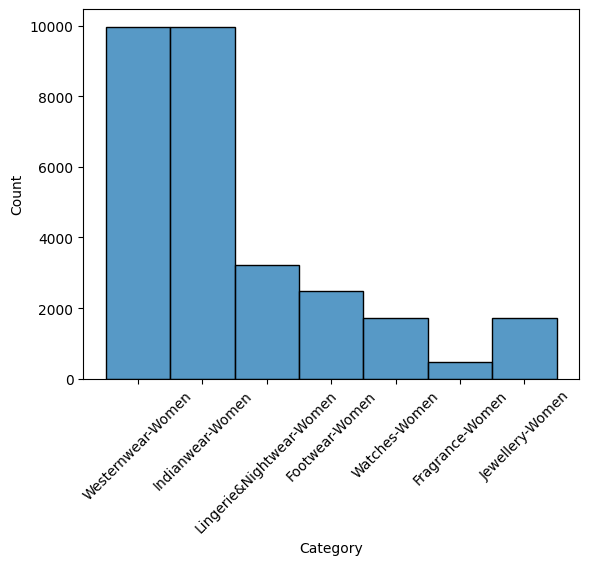

In [ ]:
sns.histplot(df["Category"])
plt.xticks(rotation=45)
plt.show()

Categories all are labeled under "Women" so it is safe to keep, in the case of men/fluid clothes might be preferrable to separate into labels for each type of clothing/item

## 1.3.4) Discount

In [ ]:
#add boolean feature for check if item is discounted
df["isDiscounted"] = df["Discount"] != "No"

In [ ]:
df

,BrandName,Details,Sizes,SellPrice,Discount,Category,MinSize,MaxSize,isDiscounted
0,life,solid cotton blend collar neck womens a-line dress - indigo,"Size:Large,Medium,Small,X-Large,X-Small",849.0,50% off,Westernwear-Women,1,9,True
1,only,polyester peter pan collar womens blouson dress - yellow,"Size:34,36,38,40",2449.0,30% off,Westernwear-Women,11,18,True
2,fratini,solid polyester blend wide neck womens regular top - off white,"Size:Large,X-Large,XX-Large",599.0,50% off,Westernwear-Women,9,15,True
3,zink london,stripes polyester sweetheart neck womens dress - black,"Size:Large,Medium,Small,X-Large",1379.0,40% off,Westernwear-Women,9,11,True
4,life,regular fit regular length denim womens jeans - stone,"Size:26,28,30,32,34,36",849.0,50% off,Westernwear-Women,2,13,True
...,...,...,...,...,...,...,...,...,...
29570,shaya by caratlane,the wing woman clover charm necklace,NaN,1250.0,No,Jewellery-Women,-1,-1,False
29571,swarovski,crystal stylish womens rodhium earrings,NaN,8950.0,No,Jewellery-Women,-1,-1,False
29572,jewelz,ethnic gold plated jhumki earrings,NaN,643.0,65% off,Jewellery-Women,-1,-1,True
29573,estelle,womens gold plated double line fancy white and gold pearl necklace,NaN,2799.0,No,Jewellery-Women,-1,-1,False


# 2) Tokenization + Data Augmentation

In [ ]:
details_dataset = df["Details"]

In [ ]:
print("First 20 Values")
details_dataset.to_frame().head(20)

First 20 Values


,Details
0,solid cotton blend collar neck womens a-line dress - indigo
1,polyester peter pan collar womens blouson dress - yellow
2,solid polyester blend wide neck womens regular top - off white
3,stripes polyester sweetheart neck womens dress - black
4,regular fit regular length denim womens jeans - stone
5,wide ankle length cotton womens jeans - light blue
6,printed cotton blend collared womens regular dress - white
7,embroidered wide neck polyester womens regular top - blush
8,floral polyester v neck womens flared dress - navy
9,checks cotton boat neck womens regular top - black


In [ ]:
print("Last 20 Values")
details_dataset.to_frame().tail(20)

Last 20 Values


,Details
29555,elan dual ring rose gold - size 60
29556,combo pack set of 9 gold earrings and set of 3 gold hairpins
29557,925 silver real pearl aki pendant with chain necklace rhodium plated gift
29558,womens metallic silver double drop with black stone western earrings - multi
29559,womens 925 sterling silver poppy mangalsutra tanmaniya pendant with chain
29560,vintage motifs multicolor bracelet - jf02854998
29561,cubic zirconia silver push back clasp womens earrings
29562,womens jad/pearl golden chain - yellow
29563,womens candy bracelet with white american diamonds bracelet
29564,beautiful white crystal silver plated earrings


In [ ]:
import re

In [ ]:
def clean_details(detail):
  '''
  drop color seperator
  space slashes
  drop numbers
  drop empty values
  drop values with 1 char
  drop stop words
  lowercase
  '''

  output = detail.replace(" - ", " ")
  # / = chr(47)
  output = output.replace(chr(47), " ")
  output = re.sub(r'\d+', '', output)
  output = output.split(" ")
  output = [word for word in output if word != ""]
  text = [word.lower() for word in output if len(word) > 1]

  stop_words = ["ourselves", "hers", "between", "yourself", "but", "again", "there", "about", "once", "during", "out", "very", "having", "with", "they", "own", "an", "be", "some", "for", "do", "its", "yours", "such", "into", "of", "most", "itself", "other", "off", "is", "s", "am", "or", "who", "as", "from", "him", "each", "the", "themselves", "until", "below", "are", "we", "these", "your", "his", "through", "don", "nor", "me", "were", "her", "more", "himself", "this", "down", "should", "our", "their", "while", "above", "both", "up", "to", "ours", "had", "she", "all", "no", "when", "at", "any", "before", "them", "same", "and", "been", "have", "in", "will", "on", "does", "yourselves", "then", "that", "because", "what", "over", "why", "so", "can", "did", "not", "now", "under", "he", "you", "herself", "has", "just", "where", "too", "only", "myself", "which", "those", "i", "after", "few", "whom", "t", "being", "if", "theirs", "my", "against", "a", "by", "doing", "it", "how", "further", "was", "here", "than"]
  output = [word for word in output if word not in stop_words]
  output = [word.lower() for word in output]


  return output

In [ ]:
for i in range(0, 25):
  print(f"\nSample #{i+1}:")
  print(clean_details(details_dataset[i]))

for i in range(29550, 29573):
  print(f"\nSample #{i+1}:")
  print(clean_details(details_dataset[i]))


Sample #1:
['solid', 'cotton', 'blend', 'collar', 'neck', 'womens', 'a-line', 'dress', 'indigo']

Sample #2:
['polyester', 'peter', 'pan', 'collar', 'womens', 'blouson', 'dress', 'yellow']

Sample #3:
['solid', 'polyester', 'blend', 'wide', 'neck', 'womens', 'regular', 'top', 'white']

Sample #4:
['stripes', 'polyester', 'sweetheart', 'neck', 'womens', 'dress', 'black']

Sample #5:
['regular', 'fit', 'regular', 'length', 'denim', 'womens', 'jeans', 'stone']

Sample #6:
['wide', 'ankle', 'length', 'cotton', 'womens', 'jeans', 'light', 'blue']

Sample #7:
['printed', 'cotton', 'blend', 'collared', 'womens', 'regular', 'dress', 'white']

Sample #8:
['embroidered', 'wide', 'neck', 'polyester', 'womens', 'regular', 'top', 'blush']

Sample #9:
['floral', 'polyester', 'v', 'neck', 'womens', 'flared', 'dress', 'navy']

Sample #10:
['checks', 'cotton', 'boat', 'neck', 'womens', 'regular', 'top', 'black']

Sample #11:
['solid', 'square', 'neck', 'cotton', 'womens', 'regular', 'dress', 'pink']



In [ ]:
ecommerce_details = [clean_details(detail) for detail in details_dataset]

In [ ]:
word_dict = {}
seen_words = []
for doc in ecommerce_details:
    for word in doc:
        if word not in word_dict:
            word_dict[word] = 1
        else:
            word_dict[word] += 1

In [ ]:
count_words = sorted(word_dict.items(), key=lambda x: x[1])
k_words = 25
top_words = list(reversed(count_words))[:k_words]

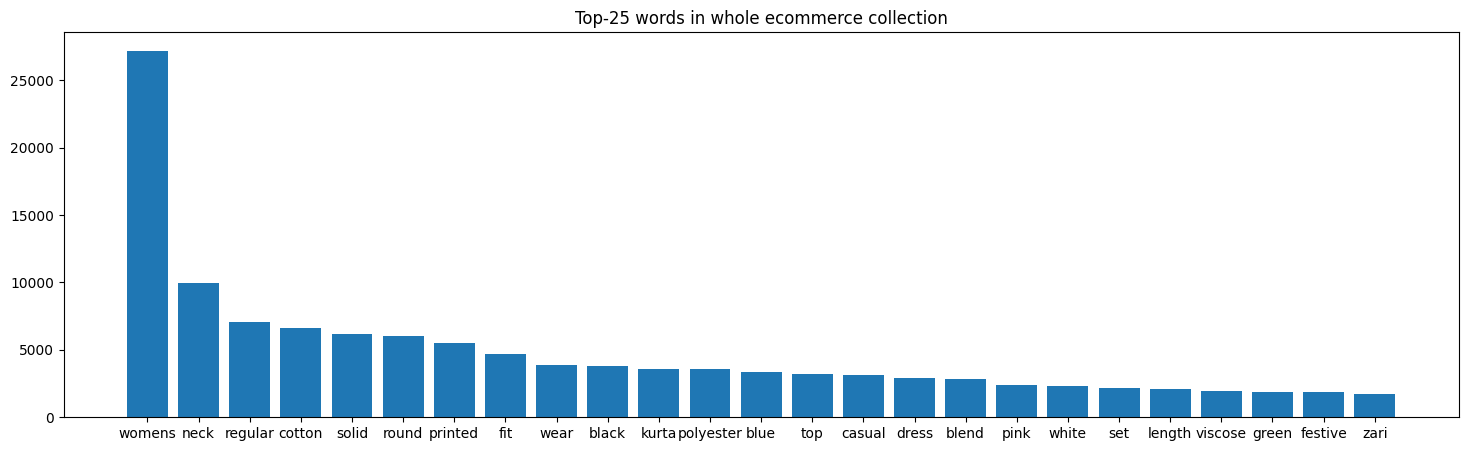

In [ ]:
plt.figure(figsize=(18,5))
plt.bar([k for (k,v) in top_words], [v for (k,v) in top_words])
plt.title(f"Top-{k_words} words in whole ecommerce collection")
plt.show()

Some key-words to abstract for modelling include:


1.   Colors: black, pink, white ...
2.   Textures: cotton, polyester, zari
3.   Styles: casual, festive
4.   Type: neck, wear, dress

## 3.1) Colors

Extract color features by check if string is in big list of colors from wikipedia

In [ ]:
wiki_colors = [color.lower() for color in open("drive/MyDrive/CS541/data/wikipedia-list-of-colors.txt").read().splitlines()]

#other colors not mentioned
wiki_colors += ["gold", "golden", "maroon", "orange", 'stone', 'green', 'purple', 'brown', 'multi', 'grey', 'teal_green', 'birch', 'khaki', 'lavender', 'fuschia', 'peacock', 'nutmeg', 'cane', 'oyster', 'spruce']

#appears often and is better used for texture feature
wiki_colors.remove("denim")

In [ ]:
def get_colors(details):
  return [detail for detail in details if detail in wiki_colors]

In [ ]:
for i in range(0, 25):
  print(f"\nSample #{i+1}:")
  print(ecommerce_details[i])
  print("Colors Found:", get_colors(ecommerce_details[i]))

for i in range(29550, 29573):
  print(f"\nSample #{i+1}:")
  print(ecommerce_details[i])
  print("Colors Found:", get_colors(ecommerce_details[i]))


Sample #1:
['solid', 'cotton', 'blend', 'collar', 'neck', 'womens', 'a-line', 'dress', 'indigo']
Colors Found: ['indigo']

Sample #2:
['polyester', 'peter', 'pan', 'collar', 'womens', 'blouson', 'dress', 'yellow']
Colors Found: ['yellow']

Sample #3:
['solid', 'polyester', 'blend', 'wide', 'neck', 'womens', 'regular', 'top', 'white']
Colors Found: ['white']

Sample #4:
['stripes', 'polyester', 'sweetheart', 'neck', 'womens', 'dress', 'black']
Colors Found: ['black']

Sample #5:
['regular', 'fit', 'regular', 'length', 'denim', 'womens', 'jeans', 'stone']
Colors Found: ['stone']

Sample #6:
['wide', 'ankle', 'length', 'cotton', 'womens', 'jeans', 'light', 'blue']
Colors Found: ['blue']

Sample #7:
['printed', 'cotton', 'blend', 'collared', 'womens', 'regular', 'dress', 'white']
Colors Found: ['white']

Sample #8:
['embroidered', 'wide', 'neck', 'polyester', 'womens', 'regular', 'top', 'blush']
Colors Found: ['blush']

Sample #9:
['floral', 'polyester', 'v', 'neck', 'womens', 'flared', '

In [ ]:
color_features = [' '.join(get_colors(detail)) for detail in ecommerce_details]

## 3.2) Textures

Create list of textures based off the top-100 words in the ecommerce set

In [ ]:
count_words = sorted(word_dict.items(), key=lambda x: x[1])
top_words = list(reversed(count_words))[25:125]

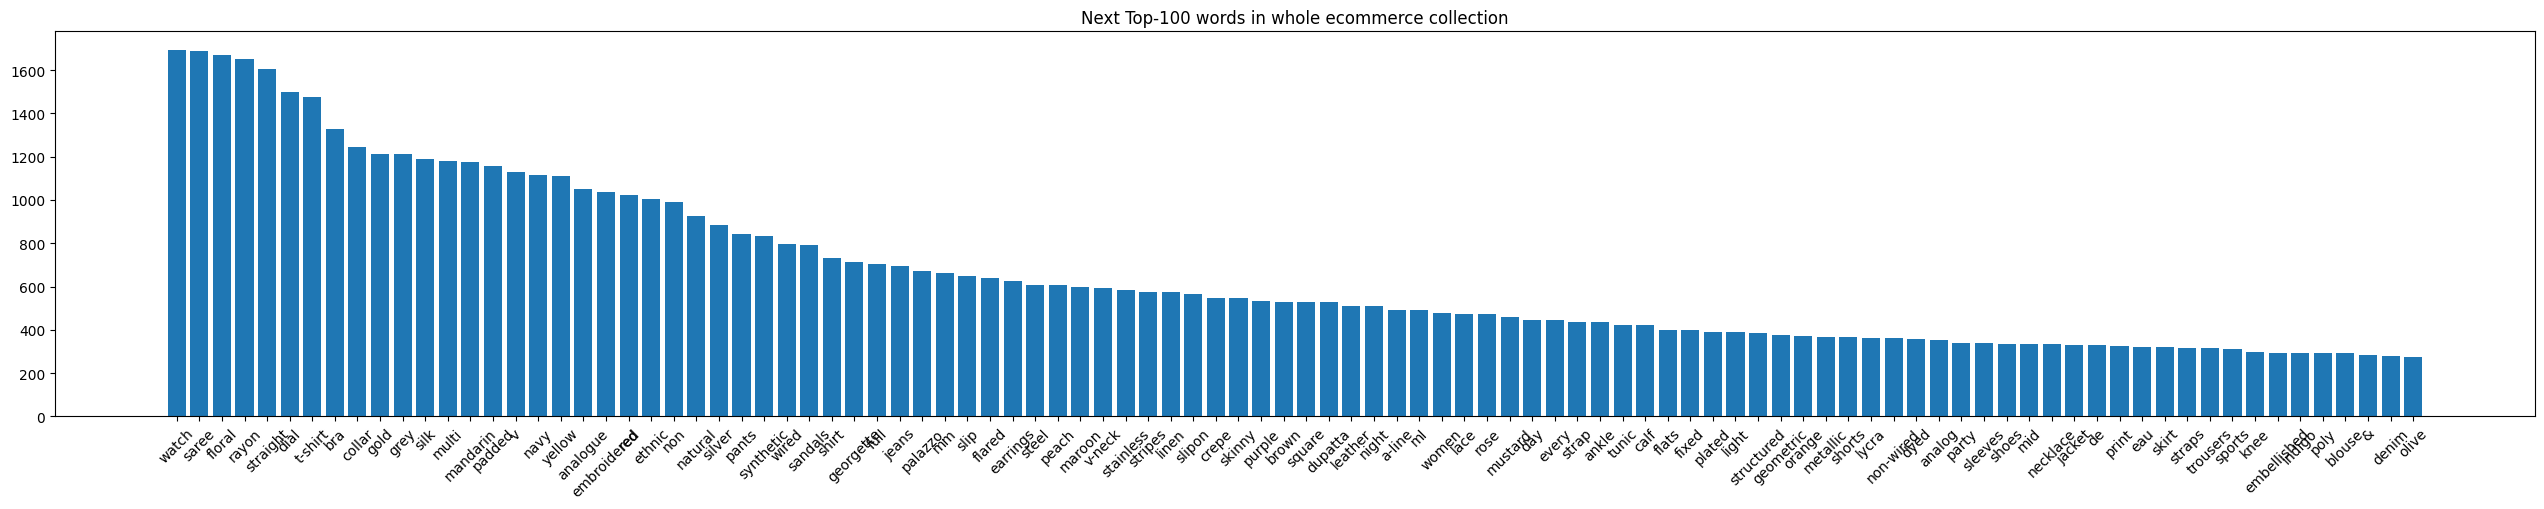

In [ ]:
plt.figure(figsize=(32,5))
plt.bar([k for (k,v) in top_words], [v for (k,v) in top_words])
plt.title(f"Next Top-100 words in whole ecommerce collection")
plt.xticks(rotation=45)
plt.show()

In [ ]:
texture_names = ["cotton", "solid", "printed", "polyester", "viscose", "silk", "embroidered", "synthetic", "wired", "georgette", "stripes", "linen", "crepe", "structured", "geometric", "denim", "print", "embellished", "poly", "nylon"]

In [ ]:
def get_textures(details):
  return [detail for detail in details if detail in texture_names]

In [ ]:
texture_features = [' '.join(get_textures(detail)) for detail in ecommerce_details]

## 3.3) Styles

Create a list of style features

In [ ]:
styles_names = ['regular', 'fit', 'casual', 'blend', 'festive', 'floral', 'straight', 'mandarin', 'ethnic', 'natural', 'palazzo', 'flared', 'night', 'party', 'stylish', 'fancy', 'formal', 'fashion',
                'contemporary', 'simple', 'western', 'vintage', 'every', 'day', 'sports']
def get_styles(details):
  return [detail for detail in details if detail in styles_names]

In [ ]:
style_features = [' '.join(get_styles(detail)) for detail in ecommerce_details]

## 3.4) Types

Types of clothes

In [ ]:
types_names = ['neck', 'solid', 'wear', 'kurta', 'top', 'dress', 'set', 'watch', 'saree', 't-shirt', 'bra', 'collar', 'padded', 'v', 'analogue', 'pants', 'sandals', 'shirt', 'jeans', 'slip',
               'earrings', 'v-neck', 'a-line', 'lace', 'strap', 'ankle', 'tunic', 'calf', 'flats', 'shorts', 'sleeves', 'shoes', 'necklace', 'jacket', 'skirt', 'straps', 'trousers', 'blouse',
               'briefs', 'mask', 'bracelet', 'band', 'ring', 'pendant', 'set', 'bangle', 'scarf', 'earring']
def get_types(details):
  return [detail for detail in details if detail in types_names]

In [ ]:
type_features = [' '.join(get_types(detail)) for detail in ecommerce_details]

## 3.4) Add New Features

In [ ]:
df['Colors'] = color_features
df['Textures'] = texture_features
df['Styles'] = style_features
df['Types'] = type_features

In [ ]:
df

,BrandName,Details,Sizes,SellPrice,Discount,Category,MinSize,MaxSize,isDiscounted,Colors,Textures,Styles,Types
0,life,solid cotton blend collar neck womens a-line dress - indigo,"Size:Large,Medium,Small,X-Large,X-Small",849.0,50% off,Westernwear-Women,1,9,True,indigo,solid cotton,blend,solid collar neck a-line dress
1,only,polyester peter pan collar womens blouson dress - yellow,"Size:34,36,38,40",2449.0,30% off,Westernwear-Women,11,18,True,yellow,polyester,,collar dress
2,fratini,solid polyester blend wide neck womens regular top - off white,"Size:Large,X-Large,XX-Large",599.0,50% off,Westernwear-Women,9,15,True,white,solid polyester,blend regular,solid neck top
3,zink london,stripes polyester sweetheart neck womens dress - black,"Size:Large,Medium,Small,X-Large",1379.0,40% off,Westernwear-Women,9,11,True,black,stripes polyester,,neck dress
4,life,regular fit regular length denim womens jeans - stone,"Size:26,28,30,32,34,36",849.0,50% off,Westernwear-Women,2,13,True,stone,denim,regular fit regular,jeans
...,...,...,...,...,...,...,...,...,...,...,...,...,...
29570,shaya by caratlane,the wing woman clover charm necklace,NaN,1250.0,No,Jewellery-Women,-1,-1,False,,,,necklace
29571,swarovski,crystal stylish womens rodhium earrings,NaN,8950.0,No,Jewellery-Women,-1,-1,False,,,stylish,earrings
29572,jewelz,ethnic gold plated jhumki earrings,NaN,643.0,65% off,Jewellery-Women,-1,-1,True,gold,,ethnic,earrings
29573,estelle,womens gold plated double line fancy white and gold pearl necklace,NaN,2799.0,No,Jewellery-Women,-1,-1,False,gold white gold pearl,,fancy,necklace


Check how many rows have empty strings for the new features

In [ ]:
#all features have more than half of rows with some value
print(len(df[df['Colors'] == ""]))
print(len(df[df['Textures'] == ""]))
print(len(df[df['Styles'] == ""]))
print(len(df[df['Types'] == ""]))

2521
8303
11158
2459


Only 387~ rows that do not contain any content from new features

In [ ]:
df[(df['Colors'] == "") & (df['Textures'] == "") & (df['Styles'] == "") & (df['Types'] == "")]

,BrandName,Details,Sizes,SellPrice,Discount,Category,MinSize,MaxSize,isDiscounted,Colors,Textures,Styles,Types
25115,puma,royal challengers bangalore unisex idp flip flops - mixed brights,"Size:6,7",799.0,No,Footwear-Women,6,7,False,,,,
25713,timex,womens multi-function watch-tw000q806,NaN,2637.0,40% off,Watches-Women,-1,-1,True,,,,
25926,timex,womens multi-function watch-tw000q810,NaN,4395.0,No,Watches-Women,-1,-1,False,,,,
26280,fastrack,fastrack ladies watch-nf6093sl01,NaN,2695.0,No,Watches-Women,-1,-1,False,,,,
26318,casio,round analog wall clock - iq-71-9df,NaN,1995.0,No,Watches-Women,-1,-1,False,,,,
...,...,...,...,...,...,...,...,...,...,...,...,...,...
28864,jewelz,bird and sheep shape cute hair clips for babies,NaN,318.0,65% off,Jewellery-Women,-1,-1,True,,,,
29193,shaze,womens tall bridge hoops,NaN,6700.0,No,Jewellery-Women,-1,-1,False,,,,
29279,belleziya,quirky small studs (set of 9,NaN,799.0,No,Jewellery-Women,-1,-1,False,,,,
29450,swarovski,"time hoop pierced earrings, white, mixed metal finish",NaN,6360.0,20% off,Jewellery-Women,-1,-1,True,,,,


About 1/3 of the dataset has content from all new features

In [ ]:
df[(df['Colors'] != "") & (df['Textures'] !=  "") & (df['Styles'] !=  "") & (df['Types'] !=  "")]

,BrandName,Details,Sizes,SellPrice,Discount,Category,MinSize,MaxSize,isDiscounted,Colors,Textures,Styles,Types
0,life,solid cotton blend collar neck womens a-line dress - indigo,"Size:Large,Medium,Small,X-Large,X-Small",849.0,50% off,Westernwear-Women,1,9,True,indigo,solid cotton,blend,solid collar neck a-line dress
2,fratini,solid polyester blend wide neck womens regular top - off white,"Size:Large,X-Large,XX-Large",599.0,50% off,Westernwear-Women,9,15,True,white,solid polyester,blend regular,solid neck top
4,life,regular fit regular length denim womens jeans - stone,"Size:26,28,30,32,34,36",849.0,50% off,Westernwear-Women,2,13,True,stone,denim,regular fit regular,jeans
6,life,printed cotton blend collared womens regular dress - white,"Size:Large,Medium,Small,X-Large,X-Small",649.0,50% off,Westernwear-Women,1,9,True,white,printed cotton,blend regular,dress
7,fratini,embroidered wide neck polyester womens regular top - blush,Size:XX-Large,649.0,50% off,Westernwear-Women,15,15,True,blush,embroidered polyester,regular,neck top
...,...,...,...,...,...,...,...,...,...,...,...,...,...
25641,lemon & pepper,synthetic patent open back womens party wedge heel sandals - gold,"Size:36,37,38,39,40",1959.0,30% off,Footwear-Women,13,18,True,gold,synthetic,party,sandals
28225,mia,92.5 silver ring in floral design embellished with multicoloured mother of pearl,NaN,5500.0,No,Jewellery-Women,-1,-1,False,silver pearl,embellished,floral,ring
28341,ayesha,womens western metallic silver embellished bracelet - multi,NaN,149.0,70% off,Jewellery-Women,-1,-1,True,silver multi,embellished,western,bracelet
28889,belleziya,gold finish and pearl embellished floral necklace,NaN,799.0,No,Jewellery-Women,-1,-1,False,gold pearl,embellished,floral,necklace


# 3) Models

In [ ]:
df

,BrandName,Details,Sizes,SellPrice,Discount,Category,MinSize,MaxSize,isDiscounted,Colors,Textures,Styles,Types
0,life,solid cotton blend collar neck womens a-line dress - indigo,"Size:Large,Medium,Small,X-Large,X-Small",849.0,50% off,Westernwear-Women,1,9,True,indigo,solid cotton,blend,solid collar neck a-line dress
1,only,polyester peter pan collar womens blouson dress - yellow,"Size:34,36,38,40",2449.0,30% off,Westernwear-Women,11,18,True,yellow,polyester,,collar dress
2,fratini,solid polyester blend wide neck womens regular top - off white,"Size:Large,X-Large,XX-Large",599.0,50% off,Westernwear-Women,9,15,True,white,solid polyester,blend regular,solid neck top
3,zink london,stripes polyester sweetheart neck womens dress - black,"Size:Large,Medium,Small,X-Large",1379.0,40% off,Westernwear-Women,9,11,True,black,stripes polyester,,neck dress
4,life,regular fit regular length denim womens jeans - stone,"Size:26,28,30,32,34,36",849.0,50% off,Westernwear-Women,2,13,True,stone,denim,regular fit regular,jeans
...,...,...,...,...,...,...,...,...,...,...,...,...,...
29570,shaya by caratlane,the wing woman clover charm necklace,NaN,1250.0,No,Jewellery-Women,-1,-1,False,,,,necklace
29571,swarovski,crystal stylish womens rodhium earrings,NaN,8950.0,No,Jewellery-Women,-1,-1,False,,,stylish,earrings
29572,jewelz,ethnic gold plated jhumki earrings,NaN,643.0,65% off,Jewellery-Women,-1,-1,True,gold,,ethnic,earrings
29573,estelle,womens gold plated double line fancy white and gold pearl necklace,NaN,2799.0,No,Jewellery-Women,-1,-1,False,gold white gold pearl,,fancy,necklace


## 3.1) Market Basket Analysis

### 3.1.1) Create Market Basket Table

In [ ]:
len(df)

29575

In [ ]:
#First lets generate a dataframe containing information on what each product contains using true/false

all_features = list(df["BrandName"].unique()) + wiki_colors + texture_names + styles_names + types_names

market_basket_features = pd.DataFrame(data= np.zeros(( len(df), len(all_features) )).astype(bool), columns=all_features)

In [ ]:
market_basket_features

,life,only,fratini,zink london,kraus,rare,van heusen,stop,zink z,cover story,...,briefs,mask,bracelet,band,ring,pendant,set,bangle,scarf,earring
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29570,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
29571,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
29572,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
29573,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [ ]:
string_features = df["BrandName"] + " " + df["Colors"] + " " + df["Textures"] + " " + df["Styles"] + " " +  df["Types"]

In [ ]:
string_features

0        life indigo solid cotton blend solid collar neck a-line dress
1                                  only yellow polyester  collar dress
2           fratini white solid polyester blend regular solid neck top
3                      zink london black stripes polyester  neck dress
4                           life stone denim regular fit regular jeans
                                     ...                              
29570                                   shaya by caratlane    necklace
29571                                     swarovski   stylish earrings
29572                                     jewelz gold  ethnic earrings
29573                    estelle gold white gold pearl  fancy necklace
29574                                                  estelle gold   
Length: 29575, dtype: object

In [ ]:
#Get all features
for feature in all_features:
  market_basket_features[feature] = string_features.str.contains(feature)

In [ ]:
#Example prompt for color "blue"
market_basket_features[market_basket_features['blue'] == True]

,life,only,fratini,zink london,kraus,rare,van heusen,stop,zink z,cover story,...,briefs,mask,bracelet,band,ring,pendant,set,bangle,scarf,earring
5,False,False,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
14,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
21,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
48,False,False,False,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
55,False,False,False,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29425,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
29443,False,False,False,False,False,False,False,False,False,False,...,False,False,False,True,True,False,False,False,False,False
29487,False,False,False,False,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False
29501,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,True


### 3.1.2) Market Basket Model

Now we use user input from Q&A and market basket to find relevant products based on the evaluation metrics of market basket. Especially lift, being an indicator whether a value has good association for values > 1.

Then we will use cosine similarity to cut down more products based on the similarity of the market basket results to the Q&A input.

In [ ]:
#code for market basket and other models to use on df dataframe

'''
Input: dictionary containing Q&A results

ex: {"Colors" : 'blue',
     "Textures": "cotton",
     "Size": 10,
     "Styles": "fit",
     "Type": "jeans"}

Outputs: Items selected by Market Basket

'''

class MarketBasket:

  def __init__(self, market_table):
    self.market_table = market_table
    self.feature_names = self.market_table.columns.unique()
    self.N = len(self.market_table)

    self.support = self.market_table.sum()/self.N

  def evaluate(self, featureA, featureB):
    conf_table = self.market_table[(self.market_table[featureA] == True) & (self.market_table[featureB] == True)]
    conf_AB = len(conf_table)/self.N

    return {"support": [self.support[featureA], self.support[featureB]],
            "confidence": [conf_AB/self.support[featureA], conf_AB/self.support[featureB]],
            "lift": conf_AB/(self.support[featureA]*self.support[featureB]),
            "table": conf_table}

  def print_eval(self, featureA, featureB):
    out = self.evaluate(featureA, featureB)

    print(f"Support -\n {featureA}: {out['support'][0]}\n {featureB}: {out['support'][0]}\n")
    print(f"Confidence -\n {featureA}: {out['confidence'][0]}\n {featureB}: {out['confidence'][0]}\n")
    print(f"Lift -\n {featureA}&{featureB}: {out['lift']}\n")

  def cosine_similarity(self, A, B):
    sim = (A @ B) / (np.sqrt(np.sum(A**2)) * np.sqrt(np.sum(B**2)))
    return sim if not np.isnan(sim) else 0

  def __call__(self, prompt, lift_threshold = 1, similarity_threshold = 0.7, debug=True):
    '''
    Run evaluation for all 2-combinations of prompts
    Keep product if strong enough lift

    Then based on the lift results, use cosine similarity to keep products that shares enough relevant information based on the Q&A
    '''

    combos = list(combinations(prompt.values(), 2))
    indices = []

    for featureA, featureB in combos:

      results = self.evaluate(featureA, featureB)
      table = results['table']
      lift = results['lift']
      if debug:
        print(f"Lift -\n {featureA}&{featureB}: {lift}\n Total Products: {len(table)}\n")

      if lift > lift_threshold:
        indices += list(table.index)

    indices = list(set(indices))

    prompt_features = np.ones(len(prompt.values()))
    final_indices = []
    lift_table = self.market_table.iloc[indices]

    for ind, index in enumerate(indices):
      product_features = np.array(lift_table.loc[index, list(prompt.values())].astype(float))

      similarity = self.cosine_similarity(prompt_features, product_features)

      if similarity >= similarity_threshold:
        final_indices += [indices[ind]]





    return final_indices

In [ ]:
marketbasket_model = MarketBasket(market_basket_features)

In [ ]:
#Example evaluation
marketbasket_model.print_eval('red', 'shirt')

Support -
 red: 0.12527472527472527
 shirt: 0.12527472527472527

Confidence -
 red: 0.07638326585695007
 shirt: 0.07638326585695007

Lift -
 red&shirt: 1.035779499183539



### 3.1.3) Sample Market Basket Result

Using a sample prompt we can what products are recommended based on the Q&A

In [ ]:
sample_prompt = {"BrandName": "kraus",
                 "Colors": "blue",
                 "Textures": "cotton",
                 "Styles": "fit",
                 "Types": "jeans"}

In [ ]:
result_indices = marketbasket_model(sample_prompt)

Lift -
 kraus&blue: 4.554938338303145
 Total Products: 191

Lift -
 kraus&cotton: 3.085019210411817
 Total Products: 263

Lift -
 kraus&fit: 3.429771257517748
 Total Products: 208

Lift -
 kraus&jeans: 20.948387266925124
 Total Products: 188

Lift -
 blue&cotton: 1.2986732723599643
 Total Products: 936

Lift -
 blue&fit: 1.4764530135877116
 Total Products: 757

Lift -
 blue&jeans: 4.388932562187658
 Total Products: 333

Lift -
 cotton&fit: 1.6529587579731004
 Total Products: 1723

Lift -
 cotton&jeans: 3.306266370218975
 Total Products: 510

Lift -
 fit&jeans: 5.431422920212158
 Total Products: 596



In [ ]:
df.iloc[result_indices]

,BrandName,Details,Sizes,SellPrice,Discount,Category,MinSize,MaxSize,isDiscounted,Colors,Textures,Styles,Types
5,kraus,wide ankle length cotton womens jeans - light blue,"Size:26,28,30,32,34",1615.0,10% off,Westernwear-Women,2,11,True,blue,cotton,,ankle jeans
16429,w,solid cotton flex regular fit womens casual trousers - blue,"Size:6,8,10,12,14",999.0,No,Indianwear-Women,6,14,False,blue,solid cotton,regular fit casual,solid trousers
8242,kraus,skinny fit cropped cotton womens jeans - olive,Size:30,947.0,50% off,Westernwear-Women,7,7,True,olive,cotton,fit,jeans
8246,kraus,skinny fit crop length cotton blend womens jeans - blue,Size:34,947.0,50% off,Westernwear-Women,11,11,True,blue,cotton,fit blend,jeans
8247,is.u,slim fit regular length cotton womens jeans - blue,Size:28,900.0,50% off,Westernwear-Women,4,4,True,blue,cotton,fit regular,jeans
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8116,spykar,super skinny fit regular length cotton womens jeans - dark blue,Size:26,1609.0,30% off,Westernwear-Women,2,2,True,blue,cotton,fit regular,jeans
8121,kraus,solid cotton slim womens casual shorts - light blue,"Size:28,30,32,34",1165.0,10% off,Westernwear-Women,4,11,True,blue,solid cotton,casual,solid shorts
8156,lovegen,skinny fit ankle length cotton polyesterwomens jeans - white,Size:X-Large,1139.0,40% off,Westernwear-Women,11,11,True,white,cotton,fit,ankle jeans
8157,crimsoune club,womens super skinny fit solid jeans - blue,"Size:26,34,36",1099.0,50% off,Westernwear-Women,2,13,True,blue,solid,fit,solid jeans


Using market basket analysis, we're able to cut down 30,000~ products down to 750~ products that maintain a variety of other products, rather than giving the specific products that contain only the Q&A results.

## 3.2) Keyword Extractor

In [ ]:
!pip install keybert
from keybert import KeyBERT

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
class BertKWExtractor:
  def __init__(self, feature_dictionary, top_n=5, drop_rate=0.2):
    self.bert_model = KeyBERT(model='all-mpnet-base-v2')
    self.top_n = top_n
    self.drop_rate = drop_rate
    self.feature_dictionary = feature_dictionary

  def filter_keywords(self, keyword_list):
    return [k for k in keyword_list if k in self.feature_dictionary]

  def __call__(self, text):
    text = text.lower()
    results = self.bert_model.extract_keywords(text,
                                     keyphrase_ngram_range=(1, 1),
                                     stop_words='english',
                                     highlight=False,
                                     top_n=self.top_n)
    return [k for (k, v) in results if v >= self.drop_rate]

In [ ]:
feature_dict = types_names + styles_names + texture_names + wiki_colors + ["discounted", "discount", "small", "medium", "large"] + df['BrandName'].unique().tolist()

bert_model = BertKWExtractor(feature_dict, top_n=10)

In [ ]:
text = "I am looking for a blue pair of jeans, any brand is fine but it needs to be fit"

results = bert_model(text)
filtered_results = bert_model.filter_keywords(results)
print("Without Preprocess Filtering:", results)
print(f"Final keywords: {filtered_results}")

Without Preprocess Filtering: ['jeans', 'blue', 'pair', 'fit', 'brand', 'looking']
Final keywords: ['jeans', 'blue', 'fit']


Using KeyBert we can extract feature names from a sentence, drop low quality words, and filter based on predefined list of existing features in dataset.

In [ ]:
df.loc[list(market_basket_features[np.all((market_basket_features[filtered_results] == True), axis=1)].index)]

,BrandName,Details,Sizes,SellPrice,Discount,Category,MinSize,MaxSize,isDiscounted,Colors,Textures,Styles,Types
81,kraus,super skinny fit ankle length cotton blend womens jeans - blue,"Size:28,30,32,34,36,38",1396.0,30% off,Westernwear-Women,4,16,True,blue,cotton,fit blend,ankle jeans
87,kraus,wide leg fit ankle length cotton womens jeans - blue,"Size:28,30,32",1525.0,10% off,Westernwear-Women,4,9,True,blue,cotton,fit,ankle jeans
108,kraus,baggy fit ankle length cotton womens jeans - light blue,"Size:28,30,32,34",1116.0,30% off,Westernwear-Women,4,11,True,blue,cotton,fit,ankle jeans
112,kraus,super skinny fit ankle length cotton blend womens jeans - dark blue,"Size:28,30,32,34,36,38",947.0,50% off,Westernwear-Women,4,16,True,blue,cotton,fit blend,ankle jeans
163,kraus,wide leg fit ankle length cotton womens jeans - dark blue,"Size:28,30,32,34,36",1256.0,30% off,Westernwear-Women,4,13,True,blue,cotton,fit,ankle jeans
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9748,kraus,skinny fit ankle length cotton womens jeans - mid blue,"Size:28,30",997.0,50% off,Westernwear-Women,4,7,True,blue,cotton,fit,ankle jeans
9768,crimsoune club,womens super skinny fit solid jeans - blue,Size:30,1079.0,40% off,Westernwear-Women,7,7,True,blue,solid,fit,solid jeans
9781,dolce crudo,skinny fit crop length cotton womens jeans - blue,"Size:26,28,30,32,34",1999.0,50% off,Westernwear-Women,2,11,True,blue,cotton,fit,jeans
9868,dolce crudo,skinny fit regular length cotton polyester womens jeans - blue,"Size:26,32",1639.0,60% off,Westernwear-Women,2,9,True,blue,cotton polyester,fit regular,jeans


# 4) Product Recommender

With just one user prompt, we can cut down the results to 275 total results

In [ ]:
class ProductRecommender:

  def __init__(self, market_table, feature_dict, top_n=10, drop_rate = 0.2):
    self.market_table = market_table
    self.marketbasket_model = MarketBasket(self.market_table)

    self.top_n = top_n
    self.drop_rate = drop_rate
    self.bert_model = BertKWExtractor(feature_dict, top_n=self.top_n, drop_rate=self.drop_rate)

  def __call__(self, question_prompts, chatbot_prompts, lift_threshold = 1.0, similarity_threshold = 0.7, bert_filter_rate = .1, debug=True):

    result_indices = self.marketbasket_model(question_prompts, lift_threshold, similarity_threshold, debug)

    if debug:
      print("Total Products Found via Market Basket - ", len(result_indices))

    final_indices = result_indices

    all_features = list(question_prompts.values())

    for message in chatbot_prompts:
      results = bert_model(message)
      filtered_results = self.bert_model.filter_keywords(results)

      all_features += filtered_results

      if debug:
        print(f"\nOriginal Message: {message}\nFiltered Message: {filtered_results}\n")

      filter_indices = np.array((self.market_table[np.all((self.market_table[filtered_results] == True), axis=1)].index))
      random_filtered = filter_indices[np.random.rand(len(filter_indices)) >= bert_filter_rate].tolist()

      final_indices = list(set(final_indices) - set(random_filtered))

      if debug:
        print("Total Products Found via KeyBert + Colloborative Filtering - ", len(final_indices))



    return {"indices": final_indices, "features": list(set(all_features))}

  def cosine_similarity(self, A, B):
    sim = (A @ B) / (np.sqrt(np.sum(A**2)) * np.sqrt(np.sum(B**2)))
    return sim if not np.isnan(sim) else 0

  def evaluate(self, indices, features):
    '''
    Evaluate final prediction based on simlarity of products to features found in Q&A and chatbot,
    divided by capacitiy to reduce total dataset to N products

    score = avg. similarity based on total features used in Q&A and chatbot

    score_capacity = score for being able to reduce total products to products filtered by querying features

    sc = score: results are as good as querying
    sc < score: results find more values than querying
    sc > score: results is able to reduce prompts more than querying

    query_dist = direct measurement of total products found vs query results, distance between query count and total products

    qd = 0: good as querying
    qd > 0: more values than querying
    qd < 0: reduce prompts more than querying
    '''

    prompt_features = np.ones((len(features)))
    eval_table = self.market_table.iloc[indices]
    similarity = 0

    for ind, index in enumerate(indices):
      product_features = np.array(eval_table.loc[index, features].astype(float))

      similarity += self.cosine_similarity(prompt_features, product_features)


    score = similarity/len(indices)

    capacity = len(list(self.market_table[np.all((self.market_table[filtered_results] == True), axis=1)].index))
    score_capacity = score / (len(indices)/capacity)

    query_dist = (len(indices) - capacity)/(len(indices)+capacity)






    return {"score": score, "score_capacity": score_capacity, "query_dist": query_dist}



In [ ]:
final_model = ProductRecommender(market_basket_features, feature_dict)

In [ ]:
final_recommendations = final_model(sample_prompt, [text])

Lift -
 kraus&blue: 4.554938338303145
 Total Products: 191

Lift -
 kraus&cotton: 3.085019210411817
 Total Products: 263

Lift -
 kraus&fit: 3.429771257517748
 Total Products: 208

Lift -
 kraus&jeans: 20.948387266925124
 Total Products: 188

Lift -
 blue&cotton: 1.2986732723599643
 Total Products: 936

Lift -
 blue&fit: 1.4764530135877116
 Total Products: 757

Lift -
 blue&jeans: 4.388932562187658
 Total Products: 333

Lift -
 cotton&fit: 1.6529587579731004
 Total Products: 1723

Lift -
 cotton&jeans: 3.306266370218975
 Total Products: 510

Lift -
 fit&jeans: 5.431422920212158
 Total Products: 596

Total Products Found via Market Basket -  753

Original Message: I am looking for a blue pair of jeans, any brand is fine but it needs to be fit
Filtered Message: ['jeans', 'blue', 'fit']

Total Products Found via KeyBert + Colloborative Filtering -  507


## 4.2) Evaluation

In [ ]:
final_model.evaluate(final_recommendations['indices'], final_recommendations['features'])

{'score': 0.7972134853563245,
 'score_capacity': 0.43241362617946594,
 'query_dist': 0.2966751918158568}

In [ ]:
df

,BrandName,Details,Sizes,SellPrice,Discount,Category,MinSize,MaxSize,isDiscounted,Colors,Textures,Styles,Types
0,life,solid cotton blend collar neck womens a-line dress - indigo,"Size:Large,Medium,Small,X-Large,X-Small",849.0,50% off,Westernwear-Women,1,9,True,indigo,solid cotton,blend,solid collar neck a-line dress
1,only,polyester peter pan collar womens blouson dress - yellow,"Size:34,36,38,40",2449.0,30% off,Westernwear-Women,11,18,True,yellow,polyester,,collar dress
2,fratini,solid polyester blend wide neck womens regular top - off white,"Size:Large,X-Large,XX-Large",599.0,50% off,Westernwear-Women,9,15,True,white,solid polyester,blend regular,solid neck top
3,zink london,stripes polyester sweetheart neck womens dress - black,"Size:Large,Medium,Small,X-Large",1379.0,40% off,Westernwear-Women,9,11,True,black,stripes polyester,,neck dress
4,life,regular fit regular length denim womens jeans - stone,"Size:26,28,30,32,34,36",849.0,50% off,Westernwear-Women,2,13,True,stone,denim,regular fit regular,jeans
...,...,...,...,...,...,...,...,...,...,...,...,...,...
29570,shaya by caratlane,the wing woman clover charm necklace,NaN,1250.0,No,Jewellery-Women,-1,-1,False,,,,necklace
29571,swarovski,crystal stylish womens rodhium earrings,NaN,8950.0,No,Jewellery-Women,-1,-1,False,,,stylish,earrings
29572,jewelz,ethnic gold plated jhumki earrings,NaN,643.0,65% off,Jewellery-Women,-1,-1,True,gold,,ethnic,earrings
29573,estelle,womens gold plated double line fancy white and gold pearl necklace,NaN,2799.0,No,Jewellery-Women,-1,-1,False,gold white gold pearl,,fancy,necklace


In [ ]:
sample_questions = [
    {"BrandName": "kraus",
                 "Colors": "blue",
                 "Textures": "cotton",
                 "Styles": "fit",
                 "Types": "jeans"},
    {"BrandName": "life",
                 "Colors": "red",
                 "Textures": "polyester",
                 "Styles": "blend",
                 "Types": "dress"},
    {"BrandName": "only",
                 "Colors": "yellow",
                 "Textures": "stone",
                 "Styles": "stylish",
                 "Types": "collar"},
    {"BrandName": "puma",
                 "Colors": "white",
                 "Textures": "denim",
                 "Styles": "sports",
                 "Types": "shoes"},
    {"BrandName": "rare",
                 "Colors": "white",
                 "Textures": "cotton",
                 "Styles": "festive",
                 "Types": "shirt"},]

In [ ]:
sample_messages = [
        ["I am looking for a blue pair of jeans, any brand is fine but it needs to be fit",
         "that are festive also"],

        ["To be more specific i am looking for a festive polyester dress",
         "Make sure they are in red"],

        ["I need a buisness, but also stylish collar",
         "Is there any with stone texture?"],

        ["I want some puma shoes for a festive event I'm holding",
         "I need them in white"],

        ["Are there any white cotton shirts",
         "I like the brand rare if there are any from that"]

]

## Hyperparameters: (lift=1.0, sim=.7, bert=.1)

In [ ]:
evals = {"score": [], "score_capacity": [], "query_dist": []}
for ind, (response, message) in enumerate(zip(sample_questions, sample_messages)):
  recommendations = final_model(response, message, lift_threshold = 1.0, similarity_threshold = 0.7, bert_filter_rate = .1, debug=False)
  eval = final_model.evaluate(recommendations['indices'], recommendations['features'])

  evals['score'] += [eval['score']]
  evals['score_capacity'] += [eval['score_capacity']]
  evals['query_dist'] += [eval['query_dist']]

pd.DataFrame.from_dict(evals)

,score,score_capacity,query_dist
0,0.727479,0.400915,0.289406
1,0.711984,1.247106,-0.273148
2,0.774597,53.253521,-0.971326
3,0.707107,5.401510,-0.768489
4,0.774597,9.261482,-0.845638


## Hyperparameters: (lift=0.8, sim=.6, bert=.1)

Less strict market basket rules

In [ ]:
evals = {"score": [], "score_capacity": [], "query_dist": []}
for ind, (response, message) in enumerate(zip(sample_questions, sample_messages)):
  recommendations = final_model(response, message, lift_threshold = .8, similarity_threshold = 0.6, bert_filter_rate = .1, debug=False)
  eval = final_model.evaluate(recommendations['indices'], recommendations['features'])

  evals['score'] += [eval['score']]
  evals['score_capacity'] += [eval['score_capacity']]
  evals['query_dist'] += [eval['query_dist']]

pd.DataFrame.from_dict(evals)

,score,score_capacity,query_dist
0,0.607437,0.063515,0.810671
1,0.600173,0.127944,0.648562
2,0.637357,1.510976,-0.406650
3,0.605970,0.881702,-0.185345
4,0.634459,0.163982,0.589246


## Hyperparameters: (lift=2, sim=.7, bert=.1)

Stricter lift

In [ ]:
evals = {"score": [], "score_capacity": [], "query_dist": []}
for ind, (response, message) in enumerate(zip(sample_questions, sample_messages)):
  recommendations = final_model(response, message, lift_threshold = 2, similarity_threshold = .7, bert_filter_rate = .1, debug=False)
  eval = final_model.evaluate(recommendations['indices'], recommendations['features'])

  evals['score'] += [eval['score']]
  evals['score_capacity'] += [eval['score_capacity']]
  evals['query_dist'] += [eval['query_dist']]

pd.DataFrame.from_dict(evals)

,score,score_capacity,query_dist
0,0.739795,0.568278,0.131122
1,0.712388,1.351080,-0.309524
2,0.774597,53.253521,-0.971326
3,0.712717,5.025565,-0.751592
4,0.774597,23.668232,-0.936620
